<a href="https://colab.research.google.com/github/Aman159/JS-image-downloader/blob/master/bikes_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [ ]:
%%capture
from tqdm import tqdm_notebook as tqdm
tqdm().pandas()

In [ ]:
from fastai import *
from fastai.vision import *

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
path = Path('/content/drive/My Drive/Colab Notebooks/sports')

In [ ]:
np.random.seed(42)
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2,
        ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)

In [ ]:
data.classes

['mopads', 'nude_bikes', 'sports']

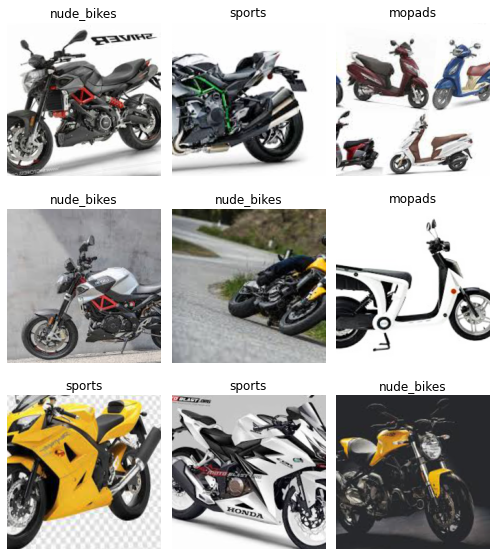

In [ ]:
data.show_batch(rows=3, figsize=(7,8))

In [ ]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

(['mopads', 'nude_bikes', 'sports'], 3, 236, 58)

TRAIN MODEL

In [ ]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/checkpoints/resnet34-333f7ec4.pth


In [ ]:
learn.fit_one_cycle(8)

epoch,train_loss,valid_loss,error_rate,time
0,1.991643,1.245531,0.500000,01:05
1,1.557907,0.786809,0.310345,00:06
2,1.196348,0.815045,0.206897,00:04
3,0.974160,0.846844,0.189655,00:03
4,0.838995,0.835289,0.189655,00:03
5,0.745492,0.774205,0.206897,00:03
6,0.676525,0.746847,0.206897,00:03
7,0.612487,0.717470,0.224138,00:03


In [ ]:
learn.save('stage-')

In [ ]:
learn.unfreeze()

In [ ]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


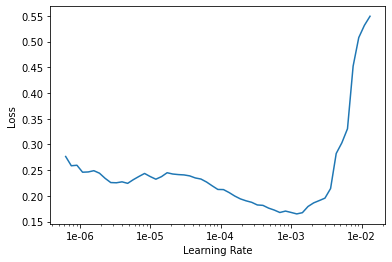

In [ ]:
learn.recorder.plot()

In [ ]:
learn.fit_one_cycle(2, max_lr=slice(1e-4,1e-3))

epoch,train_loss,valid_loss,error_rate,time
0,0.605506,7.782797,0.327586,00:03
1,0.681862,2.854177,0.224138,00:03


In [ ]:
learn.save('stage-2')

In [ ]:
learn.load('stage-2');

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)

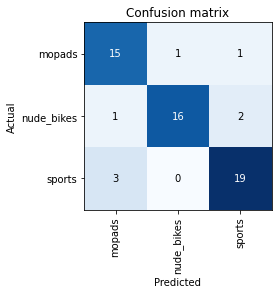

In [ ]:
interp.plot_confusion_matrix()

In [ ]:
learn.load('stage-1')

Learner(data=ImageDataBunch;

Train: LabelList (236 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
sports,sports,sports,sports,sports
Path: /content/drive/My Drive/Colab Notebooks/sports;

Valid: LabelList (58 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
sports,sports,mopads,nude_bikes,nude_bikes
Path: /content/drive/My Drive/Colab Notebooks/sports;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias

In [ ]:
learn.export()

In [ ]:
img  = open_image('/content/test_1.jpg')

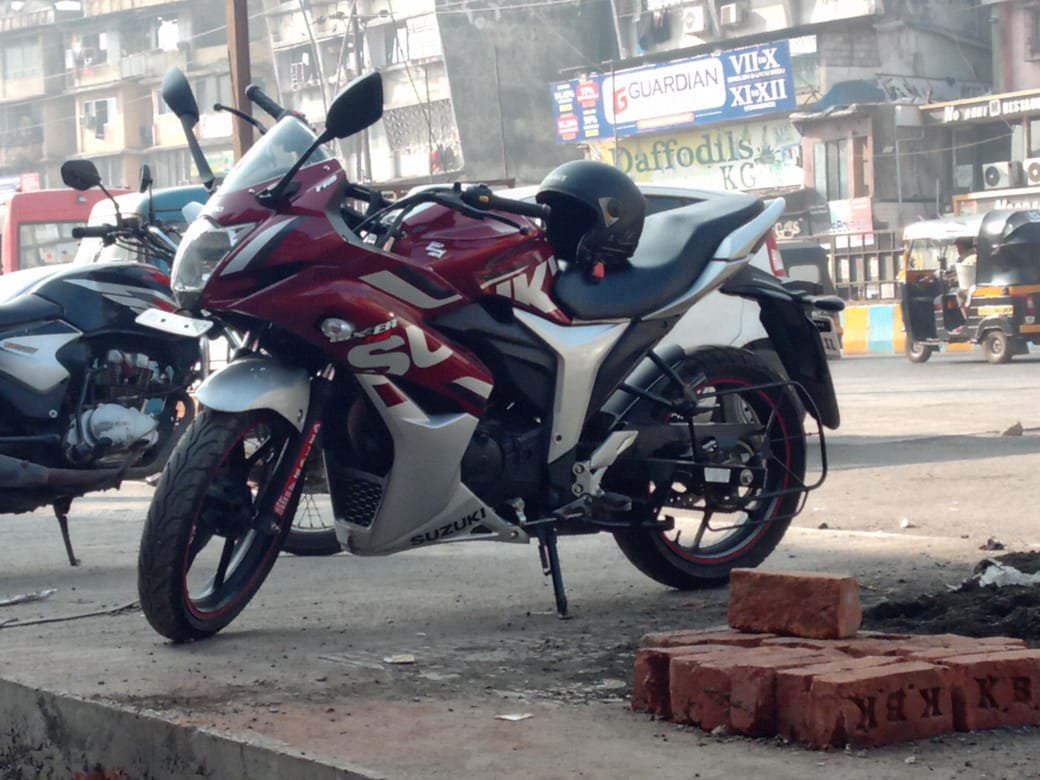

In [ ]:
img

In [ ]:
learn = load_learner('/content/drive/My Drive/Colab Notebooks/sports')

In [ ]:
classes = ['sports','nude_bikes','mopads']

In [ ]:
pred_class,pred_idx,outputs = learn.predict(img)
pred_class

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2854: UserWarning: The default behavior for interpolate/upsample with float scale_factor will change in 1.6.0 to align with other frameworks/libraries, and use scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample with float scale_factor will change "


Category tensor(2)

In [ ]:
pred_class

Category tensor(2)

In [ ]:
str(pred_class)

'sports'